In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as pl
import os
from scipy.signal import savgol_filter
from gekko import GEKKO

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Palatino",
    "font.size": 18
})

In [7]:
x = np.linspace(start=0,stop=1,num=1000)

In [8]:
def joglekar(p,x):
    return 1 - (2*x-1)**(2*p)

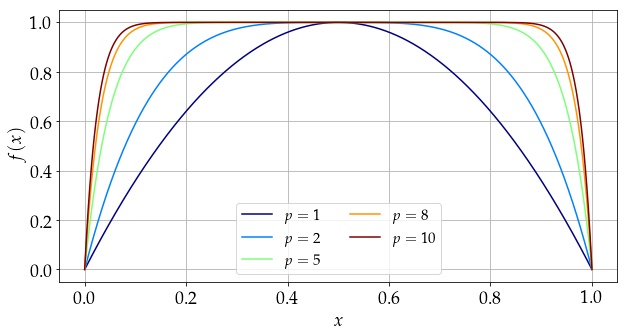

In [9]:

p = [1,2,5,8,10]
n = len(p)
colors = plt.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,5))

for i,p_i in enumerate(p):
    y = joglekar(p=p_i,x=x)
    plt.plot(x, y, color = colors[i],label = f"$p={p_i}$")
plt.legend(ncol= len(p)//2,fontsize = 15)
plt.grid(True)
#plt.tight_layout()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.savefig('joglekar.pdf',format='pdf')
plt.show()


In [25]:
def biolek(p,x,cur):
    return 1 - ( x - np.heaviside(-1*cur,1))**(2*p)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


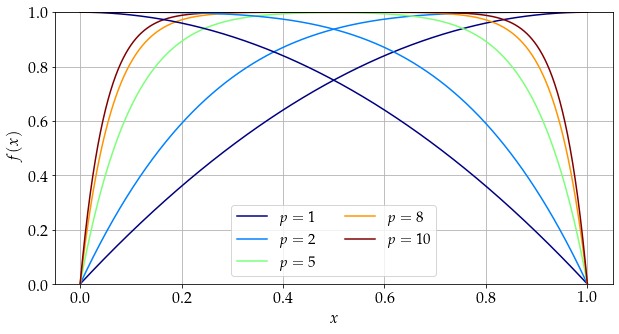

In [29]:
p = [1,2,5,8,10]
i_c = [-1,1]
n = len(p)
colors = plt.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,5))

for cur in i_c:
    for i,p_i in enumerate(p):
        y = biolek(p=p_i,x=x,cur=cur)
        if cur < 0:
            label = f"$p={p_i}$"
        else:
            label = f""
        plt.plot(x, y, color = colors[i],label = label)
        
        
    
plt.legend(ncol= len(p)//2,fontsize = 15)
plt.grid(True)
#plt.tight_layout()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.savefig('biolek.eps',format='eps')
plt.ylim(0,1)
plt.show()


In [7]:
def piecewise(x,x0,k,a,b):
    f = np.zeros_like(x)
    for (i,x_i) in enumerate(x):
        if x0<= x_i <= 1-x0:
            f[i] = (1+((x_i - 0.5)/a)**(2*b))**-1
        else:
            f[i] = k*x_i*(1-x_i)
    return(f)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


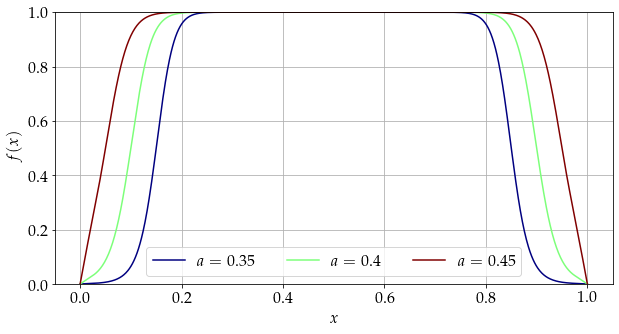

In [21]:
b = 10
a = [0.35,0.4,0.45]
k = [0.0909, 1.2771, 10.1102]
x0 = [0.0233,0.0239,0.0335]

n = len(a)
colors = plt.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,5))

for i,a_i in enumerate(a):
    
    y = piecewise(x=x,x0 = x0[i],a=a_i,b=b,k=k[i])
    plt.plot(x, y, color = colors[i],label=f"$a={a_i}$")
        
plt.legend(ncol= len(a))
plt.grid(True)
#plt.tight_layout()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.savefig('piecewise_a.eps',format='eps')
plt.ylim(0,1)
plt.show()


In [1]:
a = 0.4
b = [4,8,12]
k = [5.4842,2.4194,0.6338]
x0 = [0.0806,0.0306,0.0198]

n = len(b)
colors = plt.cm.jet(np.linspace(0,1,n))
plt.figure(figsize=(10,5))

for i,b_i in enumerate(b):
    
    y = piecewise(x=x,x0 = x0[i],a=a,b=b_i,k=k[i])
    plt.plot(x, y, color = colors[i],label=f"$b={b_i}$")
        
plt.legend(ncol= len(b))
plt.grid(True)
#plt.tight_layout()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.savefig('piecewise_b.eps',format='eps')
plt.ylim(0,1)
plt.show()


NameError: name 'plt' is not defined